<a href="https://colab.research.google.com/github/pvanand07/NIFTY50-Prediction-Twitter-NLP-Python/blob/master/NIFTY50_Prediction_Twitter_NLP_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requirements for Google Collab
1. Run the following cell
2. Restart Kernel

In [1]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 2.5 MB/s eta 0:00:00


## Import Necessory Libraries

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

## Obtaining Tweets

In [28]:
# Define the keyword and the number of tweets to scrape
query = 'nifty50'
n_tweet = 500

# Create an empty list to store the attributes of the tweets
attributes_container = []

# Scrape the tweets and extract the specified attributes
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i>n_tweet:
        break
    attributes_container.append([      
                                 tweet.user.followersCount,                             
                                 
                                 tweet.date,
                                 tweet.likeCount,
                                 
                                 tweet.content,
                                 tweet.hashtags
                               ])

# Create a dataframe from the attributes list
tweets_df = pd.DataFrame(attributes_container, columns=[
                                                   "Follows_Count",
                                                   "Date_Created",                                                   
                                                   "Like_Count",
                                                   "tweet_Content",
                                                   "Hashtags"])
                                                   


<ipython-input-28-dbe7884d585e>:18: FutureWarning: content is deprecated, use rawContent instead
  tweet.content,


## Generating Wordcloud

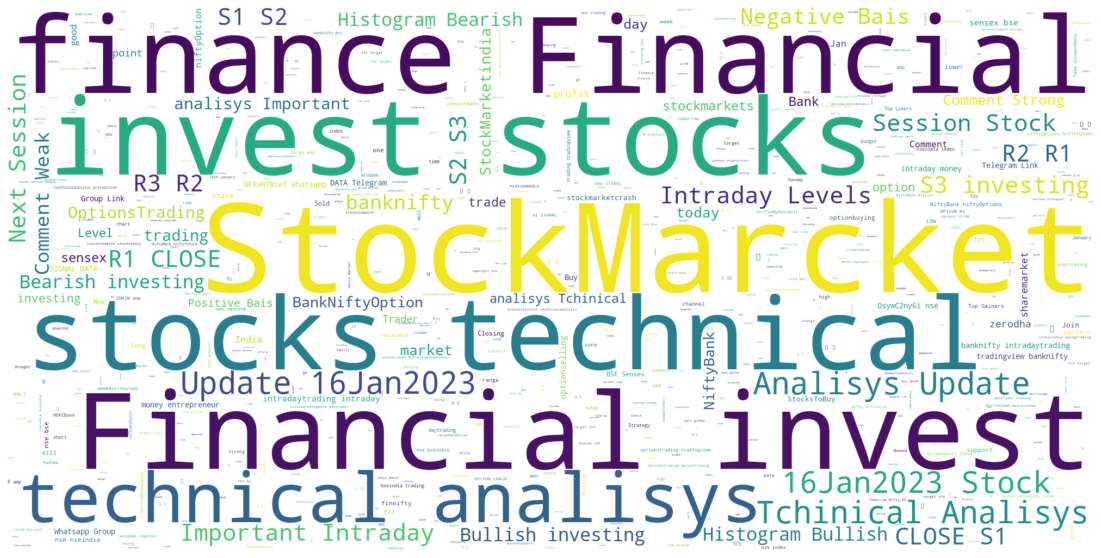

In [15]:
# Create a string of all the tweets
tweets_string = ' '.join(tweets_df['tweet_Content'])

# Create a set of stopwords
stopwords = set(STOPWORDS)
stopwords.update(["RT","https","co","nifty50","min","RSI","nifty","stockmarket","t","finantial","Analysis","business",":","30"])

# Create a word cloud object
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=2000,
                      height=1000,
                      max_words=1000,
                      contour_width=3,
                      contour_color='steelblue').generate(tweets_string)

# Plot the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentiment Analysis

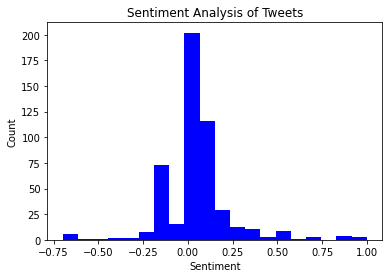

In [8]:

from textblob import TextBlob

# Add a new column to the dataframe to store the sentiment
tweets_df['Sentiment'] = tweets_df['tweet_Content'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Create a histogram of the sentiment
plt.hist(tweets_df['Sentiment'], bins=20, color='blue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Tweets')
plt.show()

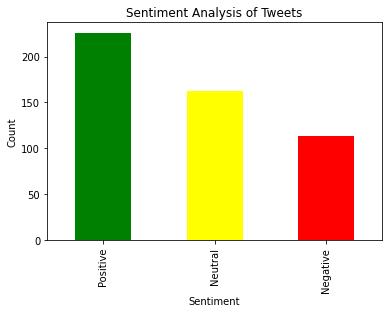

In [9]:
# Create a new column to categorize the sentiment as positive, neutral or negative
tweets_df['Sentiment_Category'] = tweets_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Neutral' if x == 0 else 'Negative')

# Create a bar plot of the sentiment category
tweets_df['Sentiment_Category'].value_counts().plot(kind='bar', color=['green', 'yellow', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Tweets')
plt.show()

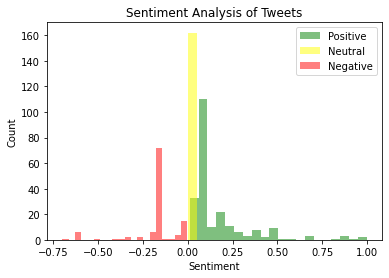

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a histogram of the sentiment
plt.hist(tweets_df[tweets_df['Sentiment'] > 0]['Sentiment'], bins=20, color='green', alpha=0.5, label='Positive')
plt.hist(tweets_df[tweets_df['Sentiment'] == 0]['Sentiment'], bins=20, color='yellow', alpha=0.5, label='Neutral')
plt.hist(tweets_df[tweets_df['Sentiment'] < 0]['Sentiment'], bins=20, color='red', alpha=0.5, label='Negative')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend()
plt.title('Sentiment Analysis of Tweets')
plt.show()

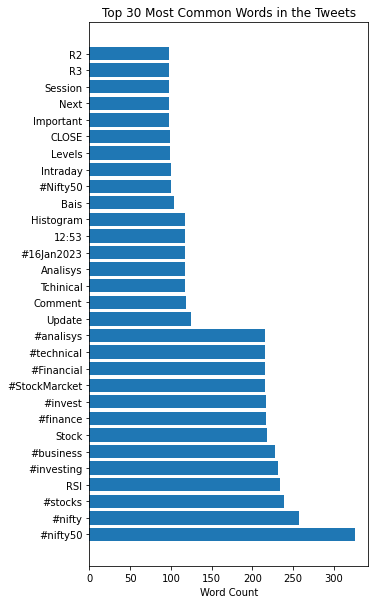

In [27]:
from collections import Counter
import matplotlib.pyplot as plt

# Create a list of all the words in the tweets
words_list = ' '.join(tweets_df['tweet_Content']).split()
unwanted_words = ['the', 'and', 'is', 'in', 'to', 'of', 'it', 'with', 'for', 'on',':','30',"RT","https","co","nifty50","min","RSI","nifty","stockmarket","t","finantial","Analysis","business",]

# Use a list comprehension to remove the unwanted words from the original list
filtered_words = [word for word in words_list if word.lower() not in unwanted_words]
# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the top 10 most common words
top_words = word_counts.most_common(30)
plt.figure(figsize=(5,10))
# Create a horizontal bar plot of the word counts
plt.barh(range(len(top_words)), [count for _,count in top_words], align='center')
plt.yticks(range(len(top_words)), [word for word, _ in top_words])
plt.xlabel('Word Count')
plt.title('Top 30 Most Common Words in the Tweets')
plt.show()